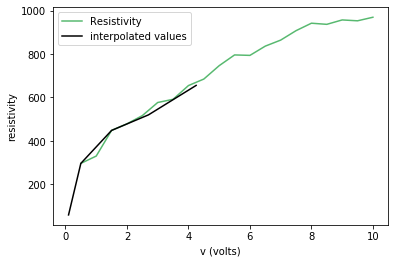

These are the interpolated values
 [59.29462365591399, 296.4731182795699, 448.35483870967744, 519.9684407176065, 655.5290165001309]


In [101]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


####### TASK 1 & 2 ##############
 
path = "/Users/Alexander/Documents/MSP/PRA1500 Tools for Practical Physics/Session 3 - Calibration Curves and Transformation of Variables/voltage current and r hold data.csv"

### Array that will be used to create the lookup table
new_V = [0.1,0.5,1.5,2.7,4.25]

### Function that calculates resistivity for the whole table or specific index
def Resistivity(path,index=None):
    
    ### Read the csv
    light_bulb_data = pd.read_csv(path)
    
    ### Runs the code below for a specific user defined variable, 'index'
    if (index!=None):
        
        ### Getting the data
        V = light_bulb_data['v (volts)'].values[index] #Voltage
        
        A = light_bulb_data['a (amps)'].values[index] #Amps
        
        R = light_bulb_data['r_hold (ohms)'].values[index] #Resistance of light bulb

        ### Calculate the resistivity using the equation below     
        resistivity = (5.65*((V/A)-R))/0.93
        
        string = "For "+str(V)+" volts, the resistivity is: " + str(resistivity)
        
        print(string)
    
    ### Runs the code below for a list of voltages
    else:
        
        V = light_bulb_data['v (volts)'].values
        
        A = light_bulb_data['a (amps)'].values #Amps
    
        R = light_bulb_data['r_hold (ohms)'].values #Resistance of light bulb
        
        resistivity = []
        
        for i in range(len(V)):
                              
            resistivity.append(5.65*((V[i]/A[i])-R[i])/0.93)
        
        return V,resistivity
function = Resistivity(path)


def Interpolate(x,y,new_V):

    new_ro = []
    
    ### Checking for every index if it is below the first data point
    for i in range(len(new_V)):
        if new_V[i] < x[0]:
            new_ro.append(0 + (new_V[0] - 0) * ((y[0]-0)/(x[0])-0))
    
    ### Calculates the interpolated values for voltages specified in the array.
    ### Uses a nested for loop to find the upper and lower bound and checks if the
    ### is in the table
    for i in range(len(function[0])):
        for j in range(len(new_V)):
            if (new_V[j] < x[i]) and (new_V[j] > x[i-1]):
                
                new_ro.append(y[i-1] + (new_V[j] - x[i-1]) * ((y[i]-y[i-1])/(x[i])-x[i-1]))
                
            elif (new_V[j] == x[i]):
                
                new_ro.append(y[i])
    
    return new_ro, new_V




### Checking if index was given
try: 
    
    x = function[0]
    y = function[1]
    
    new_x = Interpolate(x,y,new_V)[1]
    new_y = Interpolate(x,y,new_V)[0]
    
    ### Plotting the graph
    plt.plot(x, y, color='#58b970', label='Resistivity')
    plt.plot(new_x, new_y,color = '#000000', label='interpolated values')

    plt.xlabel("v (volts)")
    plt.ylabel("resistivity")
    plt.legend()
    plt.show()
    
    print("These are the interpolated values\n",Interpolate(x,y,new_V)[0])
    
except:
    
    function
    
# table = {'v (volts)':}

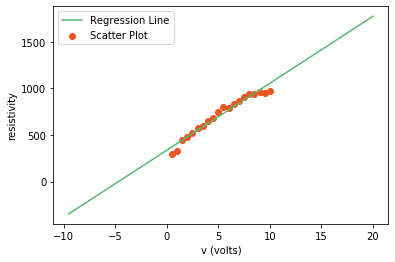

Root Mean Square Error:  43.385755930191635
R squared:  0.9580270122504676
Gradient:  71.89277951069619
y-intercept:  336.6261874585364
The error in the gradient is  3.5468684978791454
The error in the y-intercept is  21.244232312965625
The percentage error in the gradient is  4.933553163501549
The percentage error in the y-intercept is  6.310926809751652


In [102]:
####### TASK 3 ##############
### We reused the code from week 1 task 2

def Least_Squares_Analysis(function):

    # Setting the x and y arrays
    x = function[0]
    y = function[1]
    
    # Calculating their mean
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    n = len(x)
    
    numerator = 0
    denomenator = 0
    #Calculating the gradient and the y-interept
    for i in range(n):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denomenator += (x[i] - x_mean)**2
        m = numerator / denomenator
        c = y_mean - (m * x_mean)
    
    max_x = np.max(x) + 10
    min_x = np.min(x) - 10
    
    lin = np.linspace(min_x,max_x,1000)
    curve = m * lin + c
    
    # Calculating Root Mean Squares Error
    rmse = 0
    for i in range(n):
        y_pred = c + m * x[i]
        rmse += (y[i] - y_pred) ** 2
    rmse = np.sqrt(rmse/n)
    
    # Calculating R^2 Score
    ss_tot = 0
    ss_res = 0
    for i in range(n):
        y_pred = c + m * x[i]
        ss_tot += (y[i] - y_mean) ** 2
        ss_res += (y[i] - y_pred) ** 2
    r2 = 1 - (ss_res/ss_tot)
    
    # Calculating the error for the gradient and y-intercept
    s = np.sqrt((ss_tot-m*numerator)/(n-2))
    error_gradient = s/np.sqrt(denomenator)
    error_intercept = s*np.sqrt((1/n) + (x_mean**2)/denomenator)

    
    return lin,curve,x,y,rmse,r2,m,c,error_gradient,error_intercept
    

# independant = input("What's the column name for the independant variable? ")
# dependant = input("What's the column name for the dependant variable? ")
# lower_limit = int(input("From which index do you want to start the regression? "))
# upper_limit = int(input("Which index do you want the regression to finish on? "))
independant = "v (volts)"
dependant = "resistivity"
lower_limit = 0
upper_limit = 20

# Ploting Line
x_1,y_1,X,Y,rmse,r2,m,c,error_m,error_c = Least_Squares_Analysis(function)


plt.plot(x_1, y_1, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel(independant)
plt.ylabel(dependant)
plt.legend()
plt.show()
print("Root Mean Square Error: ",rmse)
print("R squared: ",r2)
print("Gradient: ",m)
print("y-intercept: ",c)
print("The error in the gradient is ",error_m)
print("The error in the y-intercept is ",error_c)
print("The percentage error in the gradient is ",(error_m/m)*100)
if (c < 0):
    print("The percentage error in the y-intercept is ",(error_c/c)*-100)
else:
    print("The percentage error in the y-intercept is ",(error_c/c)*100)

In [103]:
u = []
b = Interpolate(x,y,new_V)[0] ### values of resistivity using the lookup table
diff = []

### Calculating the resistivity using the linear regression model
for i in range(len(new_V)):
    u.append(m*new_V[i] + c)
    
# for i in range(len(u)):
#     print(u[i])

# print(len(u))
# print(len(b))


for i in range(len(u)):
    diff.append(u[i] - b[i]) 
diff

[284.520841753692,
 76.09945893431455,
 -3.8894819850967792,
 10.76825141980953,
 -13.358516121135722]

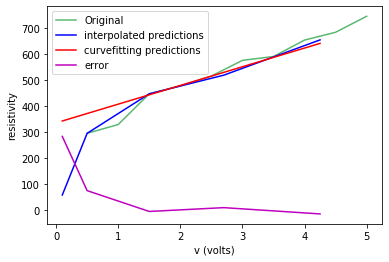

In [104]:
### Plotting the origional data
plt.plot(x[0:10], y[0:10], color='#58b970', label='Original')

### Plotting the lookup table data
plt.plot(new_x, new_y,color = 'b', label='interpolated predictions')

### Plotting the prediction from the curvefitting
plt.plot(new_x,u,color="r",label='curvefitting predictions')

### Plotting the absolute error between the interpolated and curvefitting
plt.plot(new_x,diff,color="m",label='error')

plt.xlabel("v (volts)")
plt.ylabel("resistivity")
plt.legend()
plt.show()

101.55628230696968
0.9671115379459528


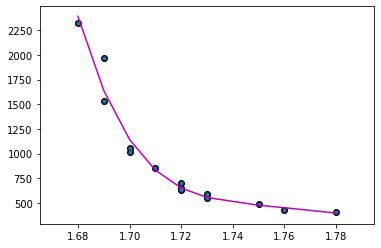

In [105]:
####### TASK 4 ##############

path = '/Users/Alexander/Documents/MSP/PRA1500 Tools for Practical Physics/Session 3 - Calibration Curves and Transformation of Variables/n vs lambda.csv'

refraction_data = pd.read_csv(path)

def Ref_Index(theta):
    return np.sqrt(((2/np.sqrt(3))*np.sin(theta) + 0.5)**2 + 0.75)

theta = np.arange(0,85,2)
ref_ind = []
for i in range(len(theta)):
    ref_ind.append(Ref_Index(theta[i]))

x = refraction_data['n']
y = refraction_data['Lambda (nm)']

plt.scatter(x,y,color='k',label='lambda vs n')

### The code for calculating the polynomial regression is 
### https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# np.random.seed(0)
x = refraction_data['n']
y = refraction_data['Lambda (nm)']
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()